# K-means clustering

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [4]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


In [5]:
feature.shape

(1000, 2)

## plot the input data

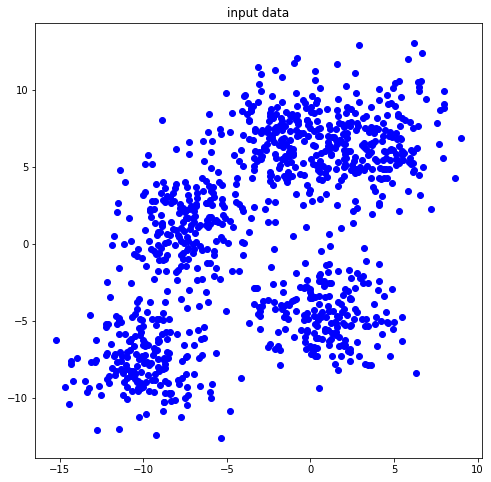

In [6]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
# fill up the blank for plotting the data

num_data1=number_data


plt1_point_0_x=[]
plt1_point_0_y=[]
    
for i in range(num_data1):
    plt1_point_0_x.append(feature[i,0])
    plt1_point_0_y.append(feature[i,1])
        
        
        
    
    
plt.scatter(plt1_point_0_x, plt1_point_0_y, marker='o', color='blue')

    
plt.show()


# ===================================================

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [7]:
arr = np.array([])
arr = np.append(arr, 1)
arr = np.append(arr, 2)
arr

array([1., 2.])

In [8]:
def compute_distance(feature, center):
    # ===================================================
    # fill up the function body
    distance=np.array([])
    for i in range(number_data):  
        arr =((feature[i]-center)**2).sum(axis = 0)
        distance = np.append(distance, arr)
    
    
    
    
    
    
    # ===================================================
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [9]:
def compute_centroid(feature, label_feature, value_label):
    
    # ===================================================
    # fill up the function body
    f_label = value_label
    
    index = np.where(label_feature==f_label)
    f_feature = feature[index]
    if(f_feature.shape[0]==0):
        centroid=0
    else:
        centroid=f_feature.sum(axis=0)/f_feature.shape[0]
    
    # ===================================================
    return centroid

In [10]:
np.array([])
feature[index].shape[0]

NameError: name 'index' is not defined

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [ ]:
def compute_label(distance):
    # ===================================================
    # fill up the function body
    index_label_feature =np.array(distance.argmin(axis=1))
    
    # ===================================================
    return index_label_feature


In [ ]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 20
# ===================================================

In [ ]:
a= np.array([])
a=np.insert(a,a.shape[0],4)
a
a=np.insert(a,a.shape[0],5)
a


In [11]:
a= np.zeros(shape=(3,3,2))
a[0,1]=np.array([1,2])
a[0,1]

arr = np.array([[3,2,1]])

row_n = arr.shape[0] ##last row
arr = np.insert(arr,row_n,[np.array([1, 2, 3])],axis= 0)
arr = np.insert(arr,row_n,[np.array([1, 2, 3])],axis= 0)
arr
arr[1:,:].T



array([[1, 1],
       [2, 2],
       [3, 3]])

In [12]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.array([])
distance = np.zeros(shape=(1,number_data))

for k in range(number_data):
        # ===================================================
        # fill up the blank
        i = k % number_cluster
        
        label_feature=np.insert(label_feature,label_feature.shape[0],i)
        
        
        
        # ===================================================

for i in range(number_iteration):
    
    loss_=0
    
    distance = np.zeros(shape=(1,number_data))
    
    
    for k in range(number_cluster):
        # ===================================================
        # fill up the blank
        
        center=compute_centroid(feature, label_feature, k)
        centroid_iteration[i,k]=center
        distance_elt=compute_distance(feature, center)
        distance = np.r_[distance,[distance_elt]]
        
        # ===================================================
    
    distance = distance[1:,:].T
    # ===================================================
    # fill up the blank
    label_feature=compute_label(distance)
    
    for k in range(number_cluster):
        
        index = np.where(label_feature==k)
        
        
        loss_ = loss_ + (((feature[index] - centroid_iteration[i,k])**2).sum(axis = 0)).sum(axis = 0)
    
    
    
    loss=loss_/number_data
    loss_iteration[i]=loss
    
    print("[%d] loss = %5.5f" % (i,loss))
    
    # ===================================================
    
    
    

NameError: name 'number_cluster' is not defined

## plot the results

In [247]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    num_data1=number_data


    plt1_point_0_x=[]
    plt1_point_0_y=[]
    
    for i in range(num_data1):
        plt1_point_0_x.append(feature[i,0])
        plt1_point_0_y.append(feature[i,1])
        
        
        
    
    
    plt.scatter(plt1_point_0_x, plt1_point_0_y, marker='o', color='blue')

    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [248]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    plt.plot(list(range(number_iteration)), list(loss_iteration), color = 'red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    # ===================================================
    plt.tight_layout()
    plt.show()

In [249]:
centroid_iteration.shape

(20, 5, 2)

In [250]:
centroid_iteration[:,0,:]

array([[-2.37659127,  0.61865388],
       [ 3.27466467,  5.53193178],
       [ 3.58244228,  6.53378971],
       [ 3.3966083 ,  6.68362495],
       [ 3.18388098,  6.76506087],
       [ 2.97537898,  6.69207051],
       [ 3.06440379,  6.65196028],
       [ 3.3881887 ,  6.58364831],
       [ 3.65310673,  6.47433295],
       [ 3.76916168,  6.50764732],
       [ 3.84121791,  6.53503908],
       [ 3.86940823,  6.54255433],
       [ 3.88307482,  6.54222312],
       [ 3.93933778,  6.55046321],
       [ 3.98412371,  6.58448832],
       [ 4.0275665 ,  6.58339492],
       [ 4.0275665 ,  6.58339492],
       [ 4.0275665 ,  6.58339492],
       [ 4.0275665 ,  6.58339492],
       [ 4.0275665 ,  6.58339492]])

In [2]:
if (number_cluster == 5):

    x1 = centroid_iteration[:,0,0]
    y1 = centroid_iteration[:,0,1]
    x2 = centroid_iteration[:,1,0]
    y2 = centroid_iteration[:,1,1]
    x3 = centroid_iteration[:,2,0]
    y3 = centroid_iteration[:,2,1]
    x4 = centroid_iteration[:,3,0]
    y4 = centroid_iteration[:,3,1]
    x5 = centroid_iteration[:,4,0]
    y5 = centroid_iteration[:,4,1]
    
    init_x = [x1[0],x2[0],x3[0],x4[0],x5[0]] 
    init_y = [y1[0],y2[0],y3[0],y4[0],y5[0]]
    final_x=[x1[-1],x2[-1],x3[-1],x4[-1],x5[-1]] 
    final_y=[y1[-1],y2[-1],y3[-1],y4[-1],y5[-1]] 
    
    
if (number_cluster == 10):

    x1 = centroid_iteration[:,0,0]
    y1 = centroid_iteration[:,0,1]
    x2 = centroid_iteration[:,1,0]
    y2 = centroid_iteration[:,1,1]
    x3 = centroid_iteration[:,2,0]
    y3 = centroid_iteration[:,2,1]
    x4 = centroid_iteration[:,3,0]
    y4 = centroid_iteration[:,3,1]
    x5 = centroid_iteration[:,4,0]
    y5 = centroid_iteration[:,4,1]
    x6 = centroid_iteration[:,5,0]
    y6 = centroid_iteration[:,5,1]
    x7 = centroid_iteration[:,6,0]
    y7 = centroid_iteration[:,6,1]
    x8 = centroid_iteration[:,7,0]
    y8 = centroid_iteration[:,7,1]
    x9 = centroid_iteration[:,8,0]
    y9 = centroid_iteration[:,8,1]
    x10 = centroid_iteration[:,9,0]
    y10 = centroid_iteration[:,9,1]
    
    init_x = [x1[0],x2[0],x3[0],x4[0],x5[0],x6[0],x7[0],x8[0],x9[0],x10[0]] 
    init_y = [y1[0],y2[0],y3[0],y4[0],y5[0],y6[0],y7[0],y8[0],y9[0],y10[0]]
    final_x=[x1[-1],x2[-1],x3[-1],x4[-1],x5[-1],x6[-1],x7[-1],x8[-1],x9[-1],x10[-1]] 
    final_y=[y1[-1],y2[-1],y3[-1],y4[-1],y5[-1],y6[-1],y7[-1],y8[-1],y9[-1],y10[-1]]



NameError: name 'number_cluster' is not defined

In [279]:
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8)) 
    plt.title('centroid')
    
    x1 = centroid_iteration[:,0,0]
    y1 = centroid_iteration[:,0,1]
    x2 = centroid_iteration[:,1,0]
    y2 = centroid_iteration[:,1,1]
    x3 = centroid_iteration[:,2,0]
    y3 = centroid_iteration[:,2,1]
    x4 = centroid_iteration[:,3,0]
    y4 = centroid_iteration[:,3,1]
    x5 = centroid_iteration[:,4,0]
    y5 = centroid_iteration[:,4,1]
    plt.plot(list(x1),list(y1),color = 'red',label='cluster=0')
    plt.plot(list(x2),list(y2),color = 'green',label='cluster=1')
    plt.plot(list(x3),list(y3),color = 'blue',label='cluster=2')
    plt.plot(list(x4),list(y4),color = 'y',label='cluster=3')
    plt.plot(list(x5),list(y5),color = 'm',label='cluster=4')
    
    
    
    
                     
    plt.scatter(init_x,init_y,marker='o', color='blue',label='initial')
    plt.scatter(final_x,final_y,marker = 's',color = 'red',label = 'final')
    
               
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

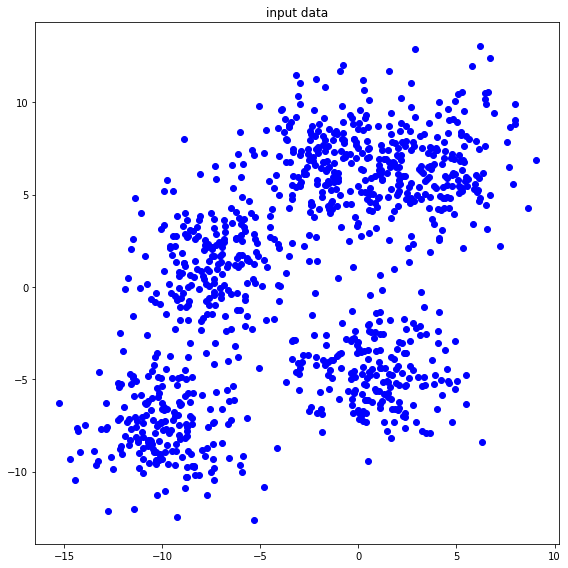

In [262]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

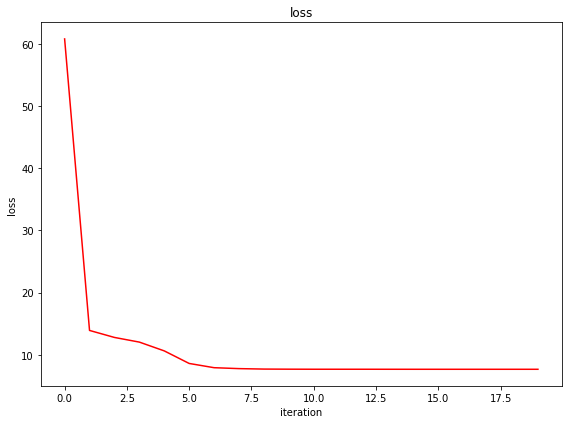

In [263]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

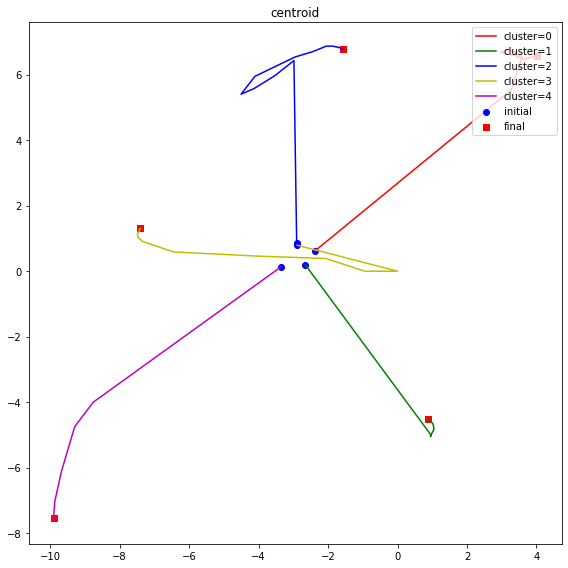

In [280]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

In [ ]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

In [ ]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

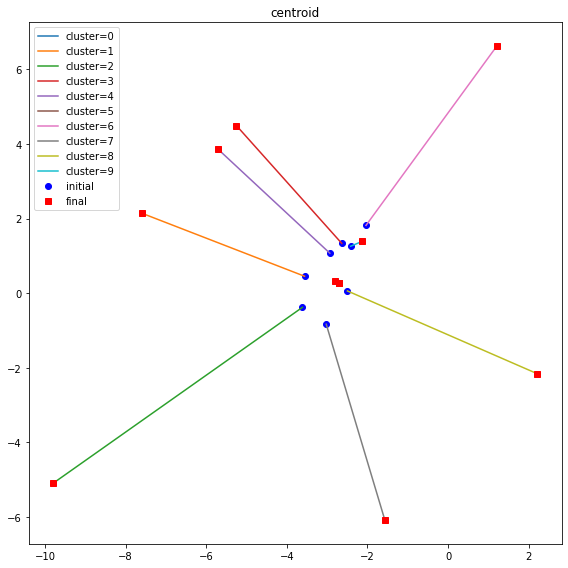

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

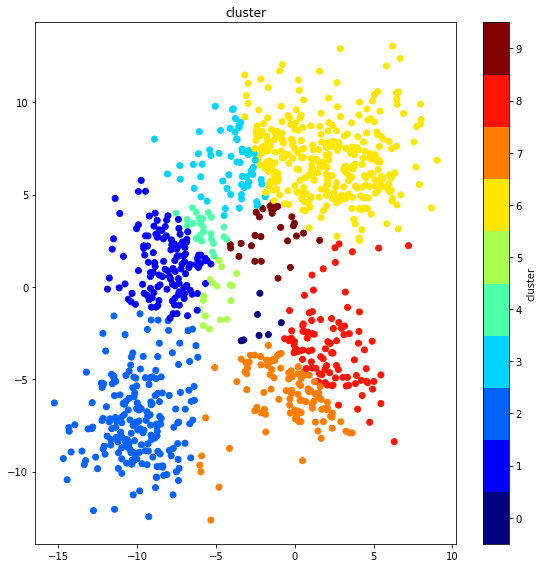

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***